In [1]:
import numpy as np
import pandas as pd
import random
from csv import reader
from random import seed
from random import randrange
import sys, itertools
import scipy.stats
import matplotlib.pyplot as plt
import LinearModelsUtils as lmu
import CorrectnessMetricUtils as cmu
import AuxUtils as auxu
import Linear_Model as lm

In [2]:
# Get CSV file
def get_csv(filename):
    dataset = list()
    with open(filename, 'r') as file:
        data = reader(file)
        for row in data:
            if not row:
                continue
            dataset.append(row)
    return dataset

# String to float columnwise
def str_to_float_col(dataset, col):
    for row in dataset:
        row[col] = float(row[col].strip())

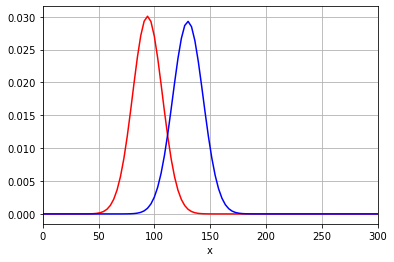

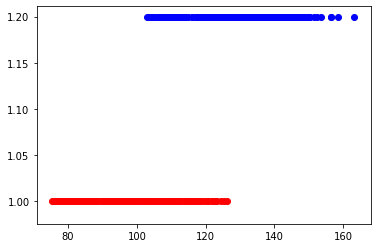

Threshold: 0.0
Accuracy: 0.6071428571428571
F1-score: 0


In [3]:
filename = 'bc.csv'
dataset = get_csv(filename)
dataset.remove(dataset[0])
for i in range(len(dataset[0])):
    str_to_float_col(dataset, i)
LDA = lmu.LinearDiscriminantAnalysis(dataset,1)
print("Threshold:", LDA.th)
print("Accuracy:", LDA.accuracy)
print("F1-score:", LDA.f_score)

In [3]:
seed(1)
filename = 'data/binary_classification.csv'
dataset = get_csv(filename)
dataset.remove(dataset[0])
for i in range(len(dataset[0])):
    str_to_float_col(dataset, i)
dataset = np.asarray(dataset)
featureset = np.delete(dataset, 3, axis=1)
target = dataset.T[3]

In [11]:
# Logistic Regression Scores
loss = ["log", "mse", "mae"]
#loss = ["log"]
x = featureset
y = target
#print (x.shape, y.shape)
obs_label = 1
for curr_loss in loss:
    train_accuracy = list()
    test_accuracy = list()
    Pscores = list()
    Rscores = list()
    Fscores = list()
    Sscores = list()
    degree = 2
    print ("Running Logistic Regression with no regularization and with loss function:", curr_loss)
    print ("A polynomial kernel of degree ", degree, " is used to transform feature set")
    model = lm.LinearModel(regression_degree = degree, loss = curr_loss, print_stuff = "none", model_type = "logistic")
    for i in range(5):
        x_train, x_test, y_train, y_test = auxu.cross_val_split(x, y, 5)[i]
        model.fit (x_train, y_train)
        y_test_hat = model.log_predict(x_test)
        y_train_hat = model.log_predict(x_train)
        #print (y_train)
        #print (y_train_hat)
        train_accuracy.append(cmu.accuracy_calc(y_train, y_train_hat))
        test_accuracy.append(cmu.accuracy_calc(y_test, y_test_hat))
        Pscores.append(cmu.precision_calc(obs_label, y_test, y_test_hat))
        Rscores.append(cmu.recall_calc(obs_label, y_test, y_test_hat))
        Fscores.append(cmu.f1_calc(obs_label, y_test, y_test_hat))
        Sscores.append(cmu.specificity_calc(obs_label,y_test, y_test_hat))
    print("Mean Train Accuracy:", np.mean(train_accuracy))
    print("Mean Test Accuracy:", np.mean(test_accuracy))
    print("Mean Precision:", np.mean(Pscores))
    print("Mean Recall:", np.mean(Rscores))
    print("Mean F1 score:", np.mean(Fscores))
    print("Mean Specificity:", np.mean(Sscores))

Running Logistic Regression with no regularization and with loss function: log
A polynomial kernel of degree  2  is used to transform feature set
Mean Train Accuracy: 0.8653571428571428
Mean Test Accuracy: 0.8271428571428572
Mean Precision: 0.8094250346700438
Mean Recall: 0.8070219505190455
Mean F1 score: 0.8016193830349634
Mean Specificity: 0.851252344233059
Running Logistic Regression with no regularization and with loss function: mse
A polynomial kernel of degree  2  is used to transform feature set
Mean Train Accuracy: 0.8596428571428572
Mean Test Accuracy: 0.8414285714285714
Mean Precision: 0.8088396836674626
Mean Recall: 0.831878097028811
Mean F1 score: 0.8178818208922014
Mean Specificity: 0.8512261950589887
Running Logistic Regression with no regularization and with loss function: mae
A polynomial kernel of degree  2  is used to transform feature set
Mean Train Accuracy: 0.6289285714285714
Mean Test Accuracy: 0.6314285714285715
Mean Precision: 0.9636363636363636
Mean Recall: 0.1

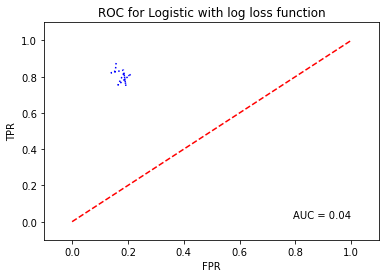

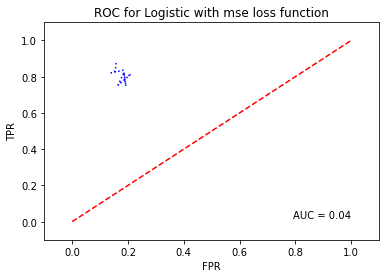

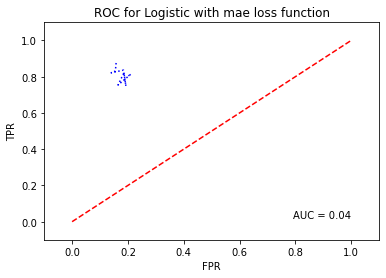

In [21]:
# Logistic Regression ROC
x = featureset
y = target
obs_label = 1
TPR = list()
FPR = list()
loss = ["log"]
degree = 1
poss_l_alpha = [0.0]
for curr_loss in loss:
    while(degree < 10):
        for l1 in poss_l_alpha:
            for l2 in poss_l_alpha:
                Rscores = list()
                Sscores = list()
                model = lm.LinearModel(regression_degree = degree, l1_alpha = l1, l2_alpha = l2, 
                                       loss = curr_loss, print_stuff = "none", model_type = "logistic")
                for i in range(5):
                    x_train, x_test, y_train, y_test = auxu.cross_val_split(x, y, 5)[i]
                    model.fit (x_train, y_train)
                    y_test_hat = model.log_predict(x_test)
                    Rscores.append(cmu.recall_calc(obs_label, y_test, y_test_hat))
                    Sscores.append(cmu.specificity_calc(obs_label,y_test, y_test_hat))
                TPR.append(np.mean(Rscores))
                FPR.append(1-np.mean(Sscores))
                degree += 1
    #plotting ROC
    auc = np.trapz(TPR, FPR)
    plt.plot(FPR, TPR, 'b:')
    plt.plot([0, 1], [0, 1],'r--')
    plt.figtext(0.7,0.2,'AUC = %0.2f' % auc)
    title = "ROC for Logistic with " + curr_loss + " loss function"
    plt.title(title)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.xlim(-0.1,1.1)
    plt.ylim(-0.1,1.1)
    plt.draw()
    plt.show()

In [9]:
# Logistic Regression Scores
x = featureset
y = target
#print (x.shape, y.shape)
obs_label = 1
train_accuracy = list()
test_accuracy = list()
Pscores = list()
Rscores = list()
Fscores = list()
Sscores = list()
degree = 1
print ("Running Perceptron Regression with no regularization and with loss function:", curr_loss)
print ("A polynomial kernel of degree ", degree, " is used to transform feature set")
for i in range(5):
    x_train, x_test, y_train, y_test = auxu.cross_val_split(x, y, 5)[i]
    model2 = lm.LinearModel(regression_degree = degree, loss = curr_loss, print_stuff = "none", model_type = "perceptron")
    model2.fit (x_train, y_train)
    y_test_hat = model2.predict(x_test)
    y_train_hat = model2.predict(x_train)
    #print (y_train)
    #print (y_train_hat)
    train_accuracy.append(cmu.accuracy_calc(y_train, y_train_hat))
    test_accuracy.append(cmu.accuracy_calc(y_test, y_test_hat))
    Pscores.append(cmu.precision_calc(obs_label, y_test, y_test_hat))
    Rscores.append(cmu.recall_calc(obs_label, y_test, y_test_hat))
    Fscores.append(cmu.f1_calc(obs_label, y_test, y_test_hat))
    Sscores.append(cmu.specificity_calc(obs_label,y_test, y_test_hat))
print("Mean Train Accuracy:", np.mean(train_accuracy))
print("Mean Test Accuracy:", np.mean(test_accuracy))
print("Mean Precision:", np.mean(Pscores))
print("Mean Recall:", np.mean(Rscores))
print("Mean F1 score:", np.mean(Fscores))
print("Mean Specificity:", np.mean(Sscores))

Running Logistic Regression with no regularization and with loss function: mae
A polynomial kernel of degree  1  is used to transform feature set
Mean Train Accuracy: 0.8478571428571428
Mean Test Accuracy: 0.8757142857142857
Mean Precision: 0.7825985585999458
Mean Recall: 0.9800688161080668
Mean F1 score: 0.8694704669093397
Mean Specificity: 0.8000799332277142


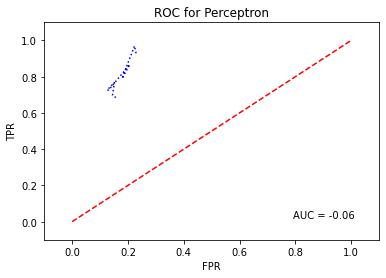

In [22]:
# Perceptron Regression ROC
x = featureset
y = target
obs_label = 1
TPR = list()
FPR = list()
degree = 1
poss_l_alpha = [0.0]
while(degree < 10):
    for l1 in poss_l_alpha:
        for l2 in poss_l_alpha:
            Rscores = list()
            Sscores = list()
            model = lm.LinearModel(regression_degree = degree, l1_alpha = l1, l2_alpha = l2, 
                                    print_stuff = "none", model_type = "perceptron")
            for i in range(5):
                x_train, x_test, y_train, y_test = auxu.cross_val_split(x, y, 5)[i]
                model.fit (x_train, y_train)
                y_test_hat = model.predict(x_test)
                Rscores.append(cmu.recall_calc(obs_label, y_test, y_test_hat))
                Sscores.append(cmu.specificity_calc(obs_label,y_test, y_test_hat))
            TPR.append(np.mean(Rscores))
            FPR.append(1-np.mean(Sscores))
            degree += 1
            
#plotting ROC

auc = np.trapz(TPR, FPR)
plt.plot(FPR, TPR, 'b:')
plt.plot([0, 1], [0, 1],'r--')
plt.figtext(0.7,0.2,'AUC = %0.2f' % auc)
plt.title('ROC for Perceptron')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.xlim(-0.1,1.1)
plt.ylim(-0.1,1.1)
plt.draw()
plt.show()